### <center> K-means </center>
                                                    

In [14]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets

data = arff.loadarff(open('3-spiral.arff','r'))[0]
databis = arff.loadarff(open('diamond9.arff','r'))[0]
datatier = arff.loadarff(open('dense-disk-5000.arff','r'))[0]


#print(data)
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

#k means
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))
    
def calinski_metric_kmeans(data2):
    scores=[]
    start = time.time()
    print('on applique kmeans avec calinski')


    for j in range(2,30):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        """plt.scatter(X, Y, c=cl)
        plt.title('k-means')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()"""
        labels = cl.labels_
        calinski=metrics.calinski_harabasz_score(data2, labels)
        scores.append(calinski)
        plt.scatter(j, calinski )

    print("The time used to execute this is given below")
    end = time.time()
    print(end - start)

    plt.title('calinski metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    
    
def sil_kmeans(data2):
    print('on applique kmeans avec sil')
    scores=[]
    start = time.time()

    for j in range(2,30):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        """plt.scatter(X, Y, c=cl)
        plt.title('k-means')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()"""
        labels = cl.labels_
        sil=metrics.silhouette_score(data2, labels, metric='euclidean')
        scores.append(sil)
        plt.scatter(j, sil )

    print("The time used to execute this is given below")
    end = time.time()
    print(end - start)

    plt.title('sil metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    
def davies_kmeans(data2):
    
    print('on applique kmeans avec davies')

    scores=[]
    start = time.time()

    for j in range(2,30):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        """plt.scatter(X, Y, c=cl)
        plt.title('k-means')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()"""
        labels = cl.labels_
        davies_b=davies_bouldin_score(data2, labels)
        scores.append(davies_b)
        plt.scatter(j, davies_b )

    print("The time used to execute this is given below")
    end = time.time()
    print(end - start)

    plt.title('davies metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
def kmeans(nbcluster, data2):
    start = time.time()
    clustering = KMeans(n_clusters=nbcluster, init = 'k-means++').fit(data2)
    plt.scatter(X, Y, c=clustering)
    end = time.time()
    print(end - start)
    plt.title('kmeans clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

### <center> Agglomerative Clustering method </center>
                                                    

In [30]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold, datasets

data = arff.loadarff(open('3-spiral.arff','r'))[0]
#print(data)
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

#k means
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))

scores=[]

def calinski_metric_agglo(data2):
    scores=[]
    start = time.time()
    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec calinski'+i)

        for j in range(2,30):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            """plt.scatter(X, Y, c=cl)
            plt.title('k-means')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()"""
            calinski=metrics.calinski_harabasz_score(data2, cl)
            scores.append(calinski)
            plt.scatter(j, calinski )

        print("The time used to execute this is given below")
        end = time.time()
        print(end - start)

        plt.title('calinski metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

def sil_agglo(data2):
    scores=[]
    start = time.time()
    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec sil'+i)


        for j in range(2,30):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            """plt.scatter(X, Y, c=cl)
            plt.title('k-means')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()"""
            sil=metrics.silhouette_score(data2, cl, metric='euclidean')
            scores.append(sil)
            plt.scatter(j, sil )

        print("The time used to execute this is given below")
        end = time.time()
        print(end - start)

        plt.title('sil metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    

def davies_agglo(data2):
    scores=[]
    start = time.time()

    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec davies'+i)

        for j in range(2,30):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            """plt.scatter(X, Y, c=cl)
            plt.title('k-means')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()"""
            davies_b=davies_bouldin_score(data2, cl)
            scores.append(davies_b)
            plt.scatter(j, davies_b )

        print("The time used to execute this is given below")
        end = time.time()
        print(end - start)

        plt.title('davies metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    
def agglo(data2, nbcluster):
    for j in ['single', 'average', 'complete', 'ward']:
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering = AgglomerativeClustering(n_clusters=nbcluster, linkage=j, affinity='euclidean').fit_predict(data2)
        plt.scatter(X, Y, c=clustering)

        plt.title('agglomerativeclustering')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        end = time.time()

        print(end - start)
        


### <center> DBSCAN </center>
                                                    

In [28]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import DBSCAN

data = arff.loadarff(open('3-spiral.arff','r'))[0]
#print(data)
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

#k means
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))

def davies_dbscan(data2):
    scores=[]    
    maxi=sys.maxint

    for my_min_samp in range(2, 5):
        for my_eps in np.arange(0.5, 2.0, 0.5):
            print('on applique dbscan avec davies, min_samp :'+my_min_samp+'eps :'+my_eps)
            start=time.time()
        # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
            clustering = DBSCAN(min_samples=my_min_samp,eps=my_eps ).fit_predict(data2)
            davies_b=davies_bouldin_score(data2, clustering)
            end = time.time()
            print(end - start)
            if davies_b > maxi :
                best_tuple= (my_min_samp, my_eps)
                maxi=davies_b
                
    print(best_tuple)
    
def sil_dbscan(data2):
    scores=[]    
    maxi=sys.maxint
    
    for my_min_samp in range(2, 5):
        for my_eps in np.arange(0.5, 2.0, 0.5):
            print('on applique dbscan avec davies, min_samples :'+my_min_samp+'eps :'+my_eps)
            start=time.time()
        # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
            clustering = DBSCAN(min_samples=my_min_samp,eps=my_eps ).fit_predict(data2)
            sil=metrics.silhouette_score(data2, clustering, metric='euclidean')
            end = time.time()
            print(end - start)
            if sil > maxi :
                best_tuple= (my_min_samp, my_eps)
                maxi=sil
                
    print(best_tuple)
    
def calinski_metric_dbscan(data2):
    scores=[]    
    maxi=sys.maxint
    
    for my_min_samp in range(2, 5):
        for my_eps in np.arange(0.5, 2.0, 0.5):
            print('on applique dbscan avec davies, min_samp :'+my_min_samp+'eps :'+my_eps)
            start=time.time()
        # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
            clustering = DBSCAN(min_samples=my_min_samp,eps=my_eps ).fit_predict(data2)
            calinski=metrics.calinski_harabasz_score(data2, clustering)
            end = time.time()
            print(end - start)
            if calinski > maxi :
                best_tuple= (my_min_samp, my_eps)
                maxi=calinski
                
    print(best_tuple)
    
def DBSCAN (data2, param):
    start=time.time()
    clustering = DBSCAN(min_samples=my_min_samp,eps=my_eps ).fit_predict(data2)
    end = time.time()
    
    plt.scatter(X, Y, c=clustering)

    plt.title('dbscanclustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


        

### <center> HDBSCAN </center>
                                                    

In [24]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.datasets import make_blobs

data = arff.loadarff(open('diamond9.arff','r'))[0]
#print(data)
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

#k means
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))


def davies_hdbscan(data2):
    scores=[] 
    maxi=sys.maxint

    for my_min_samp in range(2, 5):
        print('on applique dbscan avec davies, my_min_samp :'+my_min_samp)
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        davies_b=davies_bouldin_score(data2, labels)
        end = time.time()
        print(end - start)
        if davies_b > maxi :
            best= my_min_samp
            maxi=davies_b
                
    print(best) 
    
def sil_hdbscan(data2):
    scores=[] 
    maxi=sys.maxint

    for my_min_samp in range(2, 5):
        print('on applique dbscan avec davies, my_min_samp :'+my_min_samp)
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        sil=metrics.silhouette_score(data2, cluster_labels, metric='euclidean')
        end = time.time()
        print(end - start)
        if sil > maxi :
            best= my_min_samp
            maxi=sil
                
    print(best) 
    
    
def calinski_metric_hdbscan(data2):
    scores=[] 
    maxi=sys.maxint

    for my_min_samp in range(2, 5):
        print('on applique dbscan avec davies, my_min_samp :'+my_min_samp)
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        calinski=metrics.calinski_harabasz_score(data2, cluster_labels)
        end = time.time()
        print(end - start)
        if calinski > maxi :
            best= my_min_samp
            maxi=calinski

    print(best) 
    
    
def HDBSCAN (data2, my_min_samp):
    start=time.time()
    clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
    cluster_labels = clustering2.fit_predict(data2)
    end = time.time()
    
    plt.scatter(X, Y, c=clustering2)

    plt.title('hdbscanclustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()



        





### <center> Synthèse </center>
                                                    

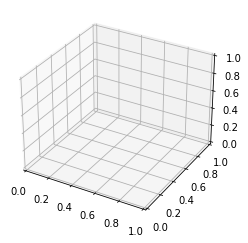

on applique kmeans avec calinski
The time used to execute this is given below
2.4247796535491943


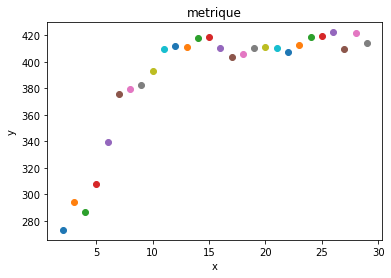

on applique kmeans avec sil
The time used to execute this is given below
2.6562790870666504


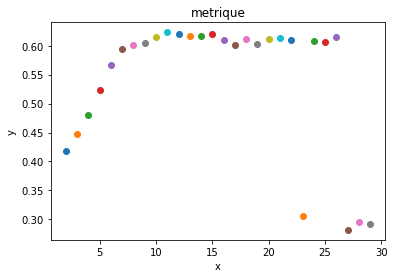

on applique kmeans avec calinski
The time used to execute this is given below
2.316606044769287


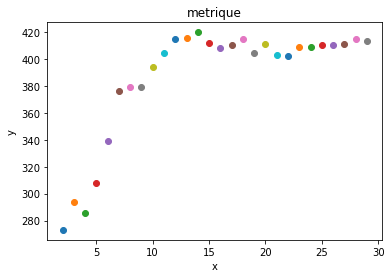

on applique kmeans avec davies
The time used to execute this is given below
2.4170758724212646


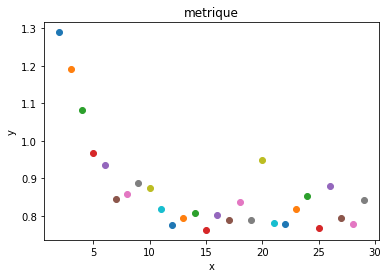

NameError: name 'sil_agglo' is not defined

In [15]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data = np.genfromtxt('dataset/a.txt')
data2 = np.genfromtxt('dataset/h.txt')
data3 = np.genfromtxt('dataset/t.txt')
data4 = np.genfromtxt('dataset/tr.txt')
data5 = np.genfromtxt('dataset/zgn.txt')
data6 = np.genfromtxt('dataset/zgo.txt')

data_ready= []
X=[]
Y=[]
Z=[]

for j in [data, data2, data3, data4, data5, data6] : 
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    y = j[:,0]
    x = j[:,1]
    z = j[:,2]
    #ax.plot(x, y, z, label='parametric curve')
    #ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
    plt.show()
    for i in range(len(j)):
        x,y,z= j[i]
        X.append(x)
        Y.append(y)
        Z.append(z)
        data_ready.append((x,y,z))
    
    calinski_metric_kmeans(data)
    sil_kmeans(data_ready)
    calinski_metric_kmeans(data_ready)
    davies_kmeans(data_ready)
    #kmeans(nbcluster=, data_ready)
    
    sil_agglo(data_ready)
    calinski_metric_agglo(data_ready)
    davies_agglo(data_ready)
    #agglo(data2, nbcluster=)
    
    

